# Data Science Lab 1 - Iris dataset

The goal is to determine wether or not the various classes of Iris are separated.

## Method 1 - distances

In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv("../data/iris.csv").drop(["sepal_width"], axis=1)
iris

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,setosa
1,4.9,1.4,0.2,setosa
2,4.7,1.3,0.2,setosa
3,4.6,1.5,0.2,setosa
4,5.0,1.4,0.2,setosa
...,...,...,...,...
145,6.7,5.2,2.3,virginica
146,6.3,5.0,1.9,virginica
147,6.5,5.2,2.0,virginica
148,6.2,5.4,2.3,virginica


### Scale data

In [3]:
from sklearn.preprocessing import StandardScaler

x = iris.drop('species', axis=1)
y = iris['species']

x_scaled = StandardScaler().fit_transform(x)
iris_scaled = pd.DataFrame(x_scaled, columns=iris.columns[:-1])
iris_scaled["species"] = y
iris_scaled

,sepal_length,petal_length,petal_width,species
0,-0.900681,-1.340227,-1.315444,setosa
1,-1.143017,-1.340227,-1.315444,setosa
2,-1.385353,-1.397064,-1.315444,setosa
3,-1.506521,-1.283389,-1.315444,setosa
4,-1.021849,-1.340227,-1.315444,setosa
...,...,...,...,...
145,1.038005,0.819596,1.448832,virginica
146,0.553333,0.705921,0.922303,virginica
147,0.795669,0.819596,1.053935,virginica
148,0.432165,0.933271,1.448832,virginica


### Covariance

In [4]:
iris_cov = np.cov(iris.drop('species', axis=1).transpose())
iris_cov_scaled = np.cov(iris_scaled.drop('species', axis=1).transpose())

In [5]:
iris_cov

array([[0.68569351, 1.27431544, 0.51627069],
       [1.27431544, 3.11627785, 1.2956094 ],
       [0.51627069, 1.2956094 , 0.58100626]])

In [6]:
iris_cov_scaled

array([[1.00671141, 0.87760447, 0.82343066],
       [0.87760447, 1.00671141, 0.96932762],
       [0.82343066, 0.96932762, 1.00671141]])

### Pair distances

#### X not scaled and C not scaled

In [7]:
from methods import pair_distances

pair_distances(iris, iris_cov)

,class 1,class 2,intra_euclid,inter_euclid,separated_euclid,intra_mahala,inter_mahala,separated_mahala
0,setosa,versicolor,0.837374,1.761703,True,5.410836,1.717038,False
1,versicolor,setosa,1.528912,2.669452,True,4.842458,1.993424,False
2,setosa,virginica,0.837374,3.369688,True,5.410836,4.192113,False
3,virginica,setosa,2.015521,4.265574,True,13.034655,4.558769,False
4,versicolor,virginica,1.528912,0.721368,False,4.842458,0.546044,False
5,virginica,versicolor,2.015521,0.650787,False,13.034655,0.363348,False


#### X not scaled and C scaled

In [8]:
pair_distances(iris, iris_cov_scaled)

,class 1,class 2,intra_euclid,inter_euclid,separated_euclid,intra_mahala,inter_mahala,separated_mahala
0,setosa,versicolor,0.837374,1.761703,True,5.633190,16.409603,True
1,versicolor,setosa,1.528912,2.669452,True,16.157121,30.172688,True
2,setosa,virginica,0.837374,3.369688,True,5.633190,54.090338,True
3,virginica,setosa,2.015521,4.265574,True,18.961296,67.414953,True
4,versicolor,virginica,1.528912,0.721368,False,16.157121,0.524606,False
5,virginica,versicolor,2.015521,0.650787,False,18.961296,0.359552,False


#### X scaled and C scaled

In [9]:
pair_distances(iris_scaled, iris_cov_scaled)

,class 1,class 2,intra_euclid,inter_euclid,separated_euclid,intra_mahala,inter_mahala,separated_mahala
0,setosa,versicolor,0.975411,1.428571,True,5.410836,1.717038,False
1,versicolor,setosa,1.434449,2.005712,True,4.842458,1.993424,False
2,setosa,virginica,0.975411,2.580930,True,5.410836,4.192113,False
3,virginica,setosa,2.173700,3.323073,True,13.034655,4.558769,False
4,versicolor,virginica,1.434449,0.485154,False,4.842458,0.546044,False
5,virginica,versicolor,2.173700,0.548631,False,13.034655,0.363348,False


#### X scaled and C not scaled

In [10]:
pair_distances(iris_scaled, iris_cov)

,class 1,class 2,intra_euclid,inter_euclid,separated_euclid,intra_mahala,inter_mahala,separated_mahala
0,setosa,versicolor,0.975411,1.428571,True,6.541954,5.299098,False
1,versicolor,setosa,1.434449,2.005712,True,8.780508,5.661205,False
2,setosa,virginica,0.975411,2.580930,True,6.541954,10.489044,True
3,virginica,setosa,2.173700,3.323073,True,22.435017,33.284382,True
4,versicolor,virginica,1.434449,0.485154,False,8.780508,0.163189,False
5,virginica,versicolor,2.173700,0.548631,False,22.435017,2.315380,False


We can conclude that *setosa* and *versicolor* are separated, as well as *setosa* and *virginica*.

However, we cannot assert that *versicolor* and *virginica* are separated.

## Method 2 - visualisation

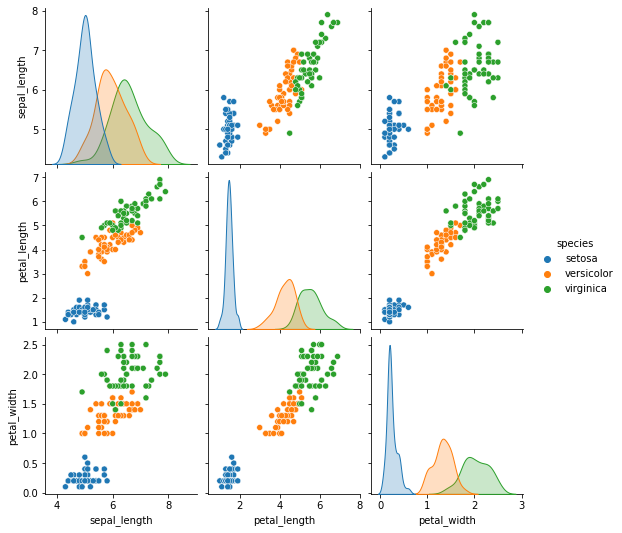

In [11]:
from seaborn import pairplot

pairplot(iris, hue='species')

We can see that in each case we distinguish (more or less) clearly the three types of flowers. We can therefore conclude that each variable carries information (typically statistical variance) about the type of flower independently.

If we could choose only one variable, it might be the width of the petals, but the results would be far from perfect. In fact, *virginica* and *versicolor* slightly overlap so are not linearly separable. Thus, let's transform variables and apply PCA to solve this.